<a href="https://colab.research.google.com/github/NikhithaKunati/Nikhitha_NFO5731_Spring2020/blob/master/Copy_of_INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [56]:
import pandas as pd
import nltk
ps = PorterStemmer()
token_list=[]
stop=[]
#stemming of the data
def stem(text):
  return ps.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
#removing stopwords
def stopwords_remove(text):
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            token_list.append(stem(token))        
    return token_list
for i in trainData['tweet']:
    stop.append(stopwords_remove(i))

#getting the ngrams
bigram = gensim.models.Phrases(stop, min_count=5)
trigram = gensim.models.Phrases(bigram[stop])  
print(trigram[bigram[stop[1]]])

word_list = gensim.corpora.Dictionary(stop)

id_list = [word_list.doc2bow(doc) for doc in stop]
#print(id_list)
lda_model =  gensim.models.LdaMulticore(id_list, num_topics =10, id2word = word_list, passes = 10,workers = 2)
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} and Words: {}".format(idx, topic ))

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['desertfoxi', 'thi', 'rich', 'nnfirst', 'unleash', 'wuhancoronaviru', 'world', 'nnthen', 'suppli', 'substandard', 'medic', 'equip', 'amp', 'ppe', 'item', 'mxexxa', 'solomonyu', 'million', 'miss', 'mobil', 'phone', 'wuhan', 'crematorium', 'get', 'kill', 'wuhancoronaviru', 'cxexxa', 'desertfoxi', 'spokespersonchn', 'becau', 'wuhancoronaviru', 'origin', 'wuhan', 'nnbecau', 'china', 'hide', 'human', 'human', 'transmiss', 'overxexxa', 'byronwan', 'wonder', 'xfxfxaxa', 'wuhancoronaviru', 'wuhanviru', 'covid', 'cestmoiz', 'nin', 'end', 'ill', 'chineseghafoora', 'byronwan', 'ugli', 'truth', 'chinaxexx', 'rule', 'wuhanviru', 'covid', 'brobrein', 'wuhancoronaviru', 'bioweapon', 'follow', 'money', 'trail', 'ye', 'mean', 'youll', 'somexexxa', 'httpstcohkpyp', 'solomonyu', 'million', 'miss', 'mobil', 'phone', 'wuhan', 'crematorium', 'get', 'kill', 'wuhancoronaviru', 'cxexxa', 'bmeat', 'eater', 'viru', 'wuhancoronaviru', 'covidmalaysia', 'cestmoiz', 'namazingli', 'regim', 'punish', 'free', 'speech'

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [57]:
import pandas as pd
# train Data
Data = pd.read_csv("clean.csv",names=["id","statement","response"],header=None)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Create feature vectors
y=Data.response
trainData=Data
x=Data.drop('response',axis=1)
testData=Data
print(testData)
vectorizer = TfidfVectorizer(min_df = 5,max_df = 0.8, sublinear_tf = True,use_idf = True)
train_vectors = vectorizer.fit_transform(trainData['statement'])
test_vectors = vectorizer.transform(testData['statement'])

X_train, X_test, y_train, y_test = train_test_split(train_vectors, y, test_size=0.2, random_state=0)
# Linear Algorithm

import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(X_train, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(X_test)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

print(classification_report(y_test, prediction_linear))
print(accuracy_score(y_test, prediction_linear))

     id                                          statement  response
0     1  desertfoxi thi rich nnfirst unleash wuhancoron...  positive
1     2  solomonyu some million miss mobil phone found ...   neutral
2     3  desertfoxi spokespersonchn becaus wuhancoronav...   neutral
3     4  byronwan no wonder xfxfxaxa wuhancoronaviru wu...   neutral
4     5  cestmoiz nin end ill say chineseghafoora thisn...  negative
..  ...                                                ...       ...
95   96  taiwanformosan german intel bnd china ask who ...   neutral
96   97  elleharthart mboksrmaga adam your cozi ccp whi...   neutral
97   98  xiongtx close calla top offici xfxfxxbxfxfxxba...  positive
98   99  taiwanformosan german intel bnd china ask who ...   neutral
99  100  blingostev senatorhousako depend china send u ...  negative

[100 rows x 3 columns]
Training time: 0.002621s; Prediction time: 0.000307s
              precision    recall  f1-score   support

    negative       0.00      0.00      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


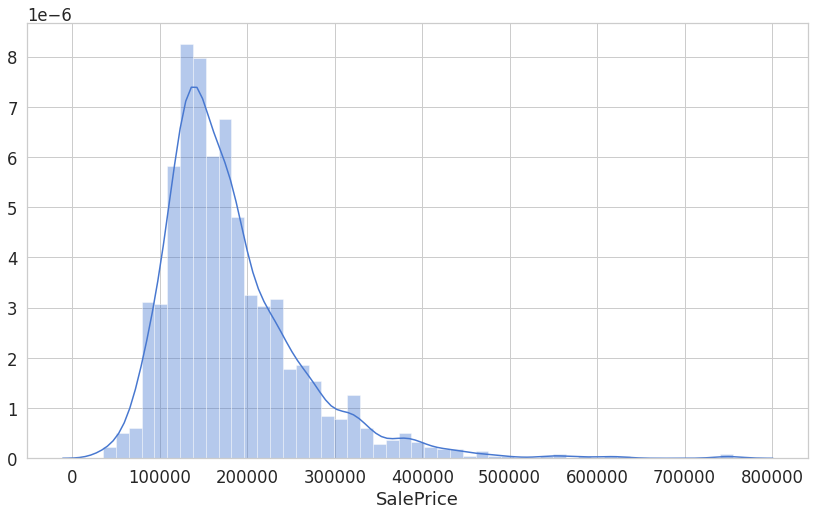

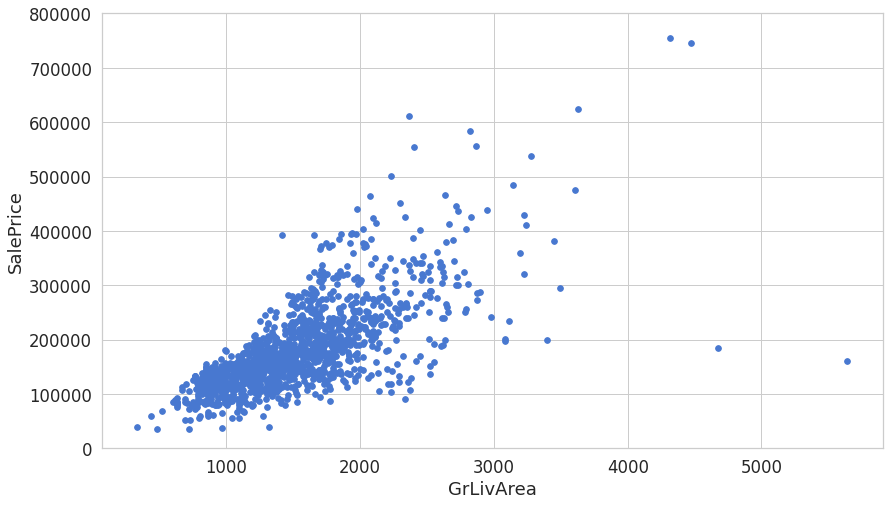

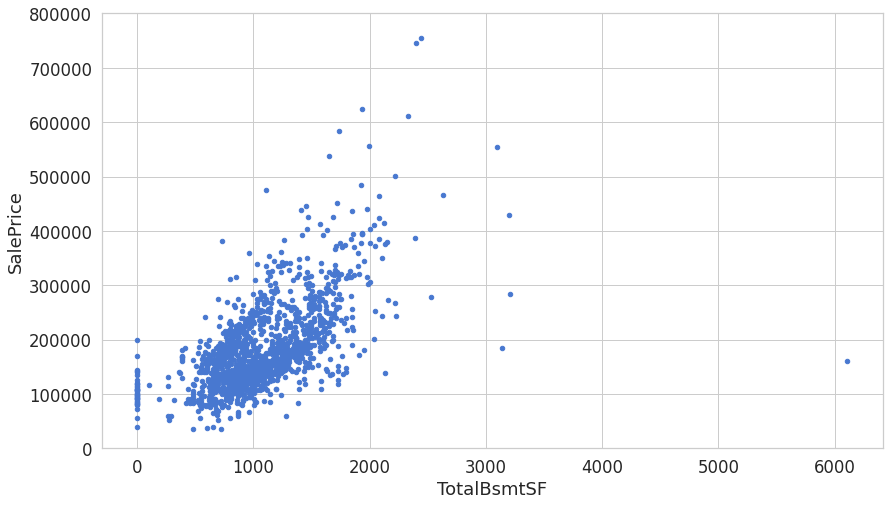

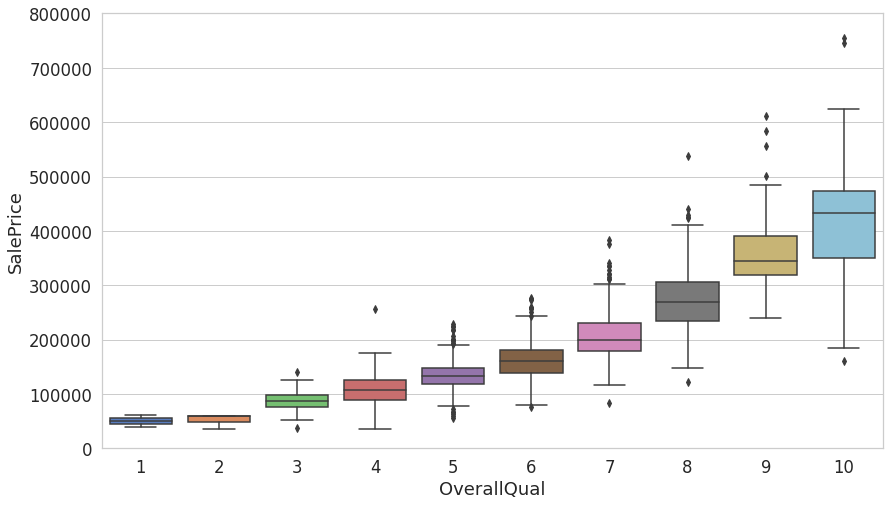

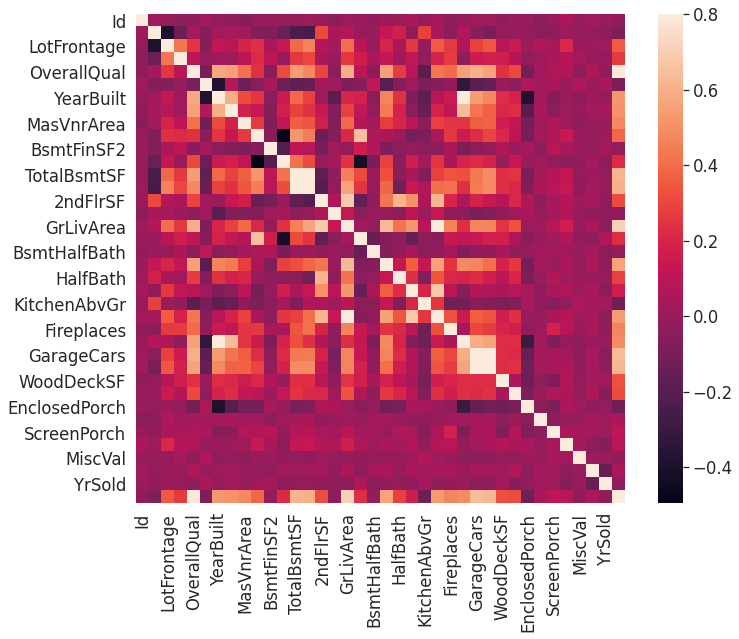

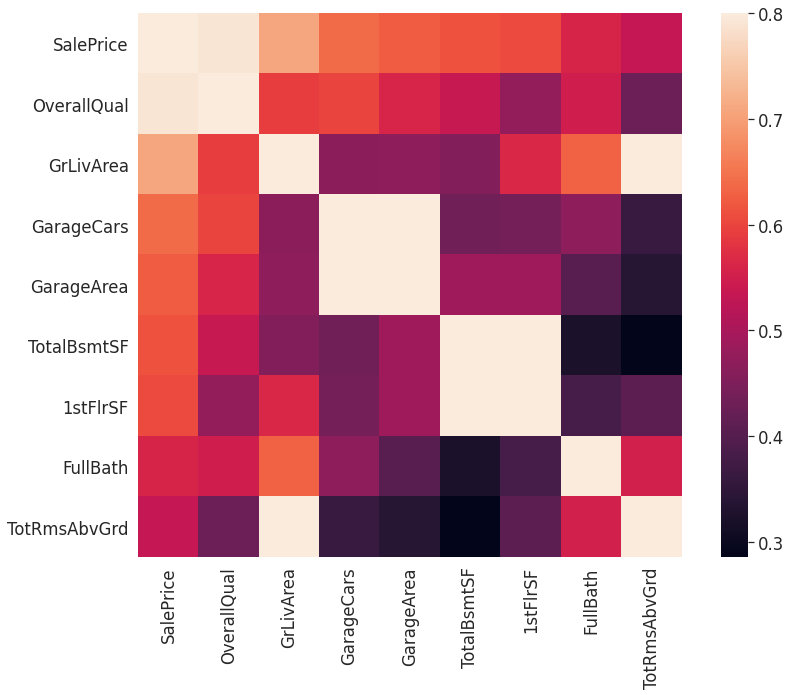

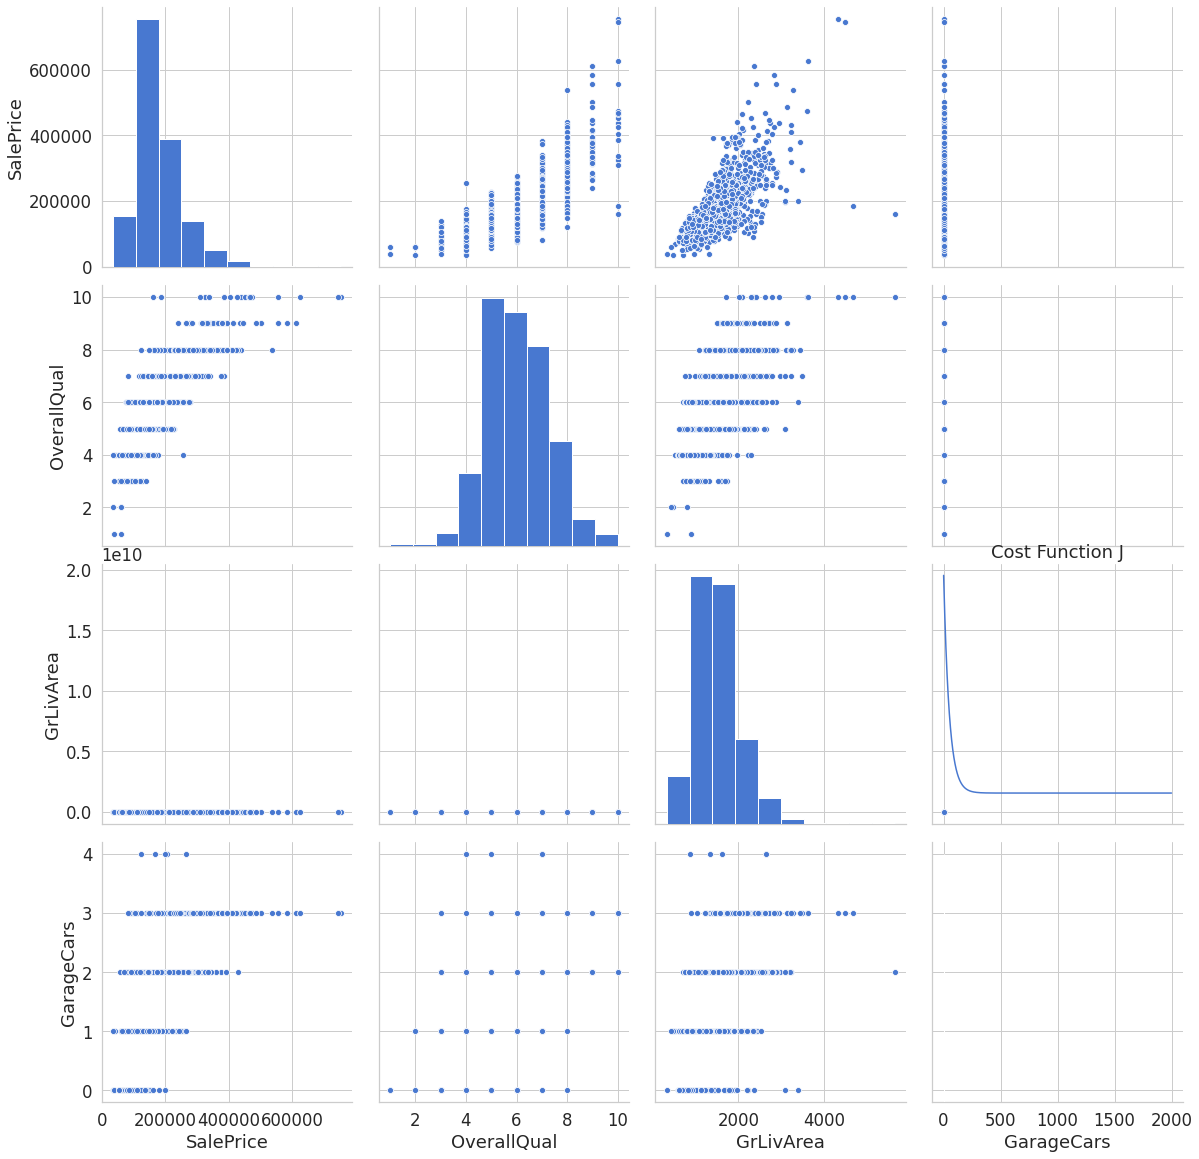

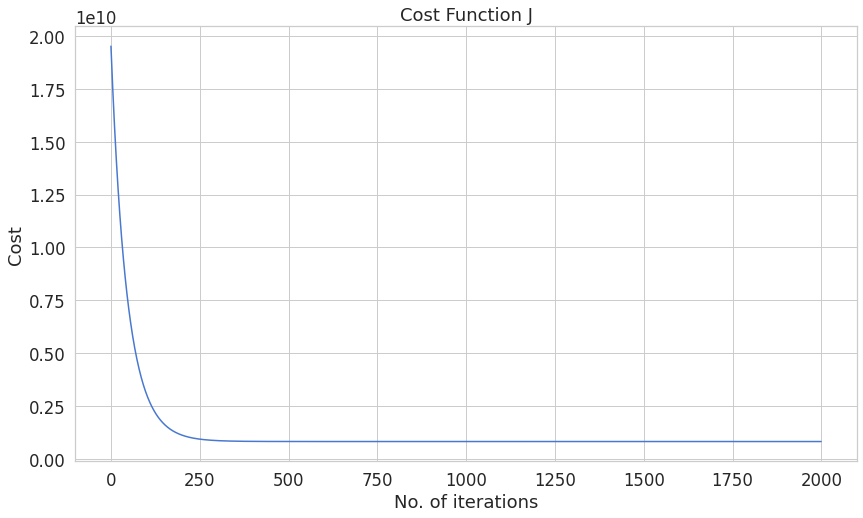

822817042.8437098

In [32]:
# Write your code here
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)
df_train = pd.read_csv('/content/train.csv')
sns.distplot(df_train['SalePrice']);
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4);
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
x = df_train['GrLivArea']
y = df_train['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

class LinearRegression:
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._w_history = [self._W]
    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = loss(prediction, y)
        
        self._cost_history.append(cost)
        
        self._gradient_descent_step(x, y, lr)
        
        self._w_history.append(self._W.copy())
    return self
class TestLinearRegression(unittest.TestCase):
  def test_find_coefficients(self):
    clf = LinearRegression()
    clf.fit(x, y, n_iter=2000, lr=0.01)
    np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)
clf._W
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()
clf._cost_history[-1]
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y)
line, = ax.plot([], [], lw=2, color='red')
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()
x = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)
clf._W
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()
clf._cost_history[-1]